# Trabajo Práctico Integrador

<img src= 'Portada.png'>


Segundo Cuatrimestre - 2022 

Docente : Regina Molares

## Análisis exploratorio

In [1]:
# 1. IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2. CARGAR LOS DATOS EN EL DATAFRAME
df = pd.read_csv('/work/exams.csv')
df

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


In [3]:
# Vemos las 6 primeras filas
df.head(6)

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
5,67-3666190,female,group D,high school,standard,yes,none,63.0,77.0,76.0,72.0


In [4]:
#  Vemos las últimas 5 filas
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [5]:
# Resumen estadístico de nuestro dataframe, nos da una serie de informes sobre el contenido 
# de las columnas numéricas: conteos, promedios, desviación std, mínimo, máximo y los cuartiles.
df.describe()


,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [6]:
# 3. REVISAR LOS TIPOS DE DATOS
#    ¿Qué tipo de dato hay en cada columna?
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

In [7]:
# Tenemos id, género, raza, nivel educación padres, almuerzo, si están empleados, si hicieron el curso
# de ingreso, y las notas de las materias matemática, física, química y álgebra

In [8]:
# 4. ELIMINAR LOS DUPLICADOS
print(f'Original: {df.id.count()} filas')   #utilizo la columna id que puede tener duplicados

duplicate_rows_df = df[df.duplicated()] # genero set de datos con los duplicados
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

# Eliminar los duplicados
df = df.drop_duplicates()



Original: 1018 filas
Cantidad de filas duplicadas: 18


In [9]:
# filas después de eliminar los duplicados.  (1000)
print(df['id'].count())

1000


In [10]:
# 5. ELIMINAR COLUMNAS IRRELEVANTES
print(df.columns)  # primero vemos todas las columnas
df = df.drop(['id'], axis=1)

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'employed', 'test preparation course', 'math score',
       'physics score', 'chemistry score', 'algebra_score'],
      dtype='object')


In [11]:
print(df.columns) # ejecuto nuevamente para ver las columnas ahora para ver que la 
# columna id no existe en el dataframe

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [12]:
# 6 . RENOMBRAR LAS COLUMNAS (con el método rename)
df = df.rename(columns ={
    "gender": "Gender",
    "race/ethnicity": "Ethnicity",
    "parental level of education": "Parental level of education",
    "lunch": "Lunch",
    "employed": "Employed",
    "test preparation course": "Test preparation course",
    "math score": "Math score",
    "physics score": "Physics score",
    "chemistry score": "Chemistry score",
    "algebra_score": "Algebra score"})
df.columns

Index(['Gender', 'Ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score'],
      dtype='object')

In [13]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS
# Encontrar los valores nulos
print(df.isnull().sum())  # tenemos 7 personas que no se presentaron a los exámenes

# Eliminar los valores perdidos
df = df.dropna()
print()

# Después de eliminar los nulos
print(df.isnull().sum()) # veo que no tengo ningún valor nulo

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     0
Physics score                  0
Chemistry score                0
Algebra score                  0
dtype: int64


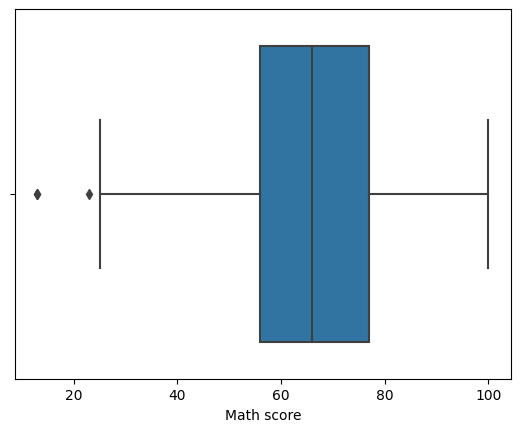

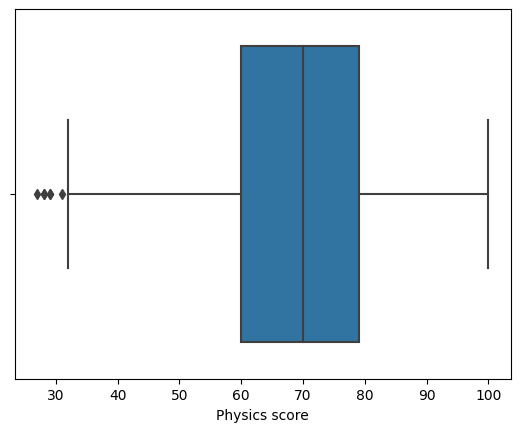

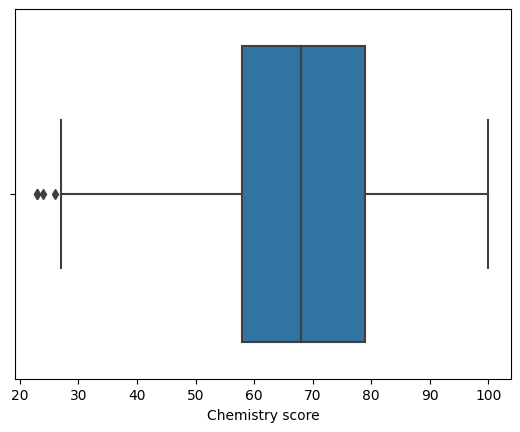

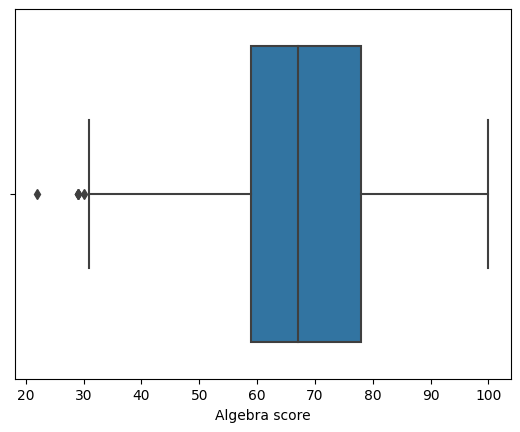

In [14]:
# 8. DETECTAR LOS OUTLIERS.  
sns.boxplot(x=df["Math score"])
plt.show()
sns.boxplot(x=df['Physics score'])
plt.show()
sns.boxplot(x=df['Chemistry score'])
plt.show()
sns.boxplot(x=df['Algebra score'])
plt.show()



In [15]:

print(f'Antes: {df.Lunch.count()} filas\n') 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Después: {df.Lunch.count()} filas') 


Antes: 993 filas

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64
Después: 984 filas
/tmp/ipykernel_130/3087813875.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_130/3087813875.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


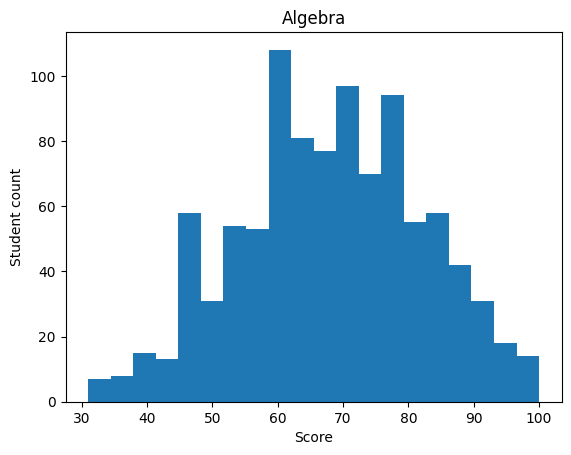

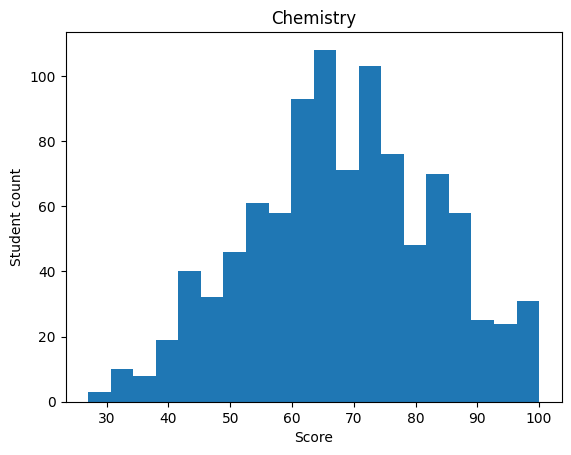

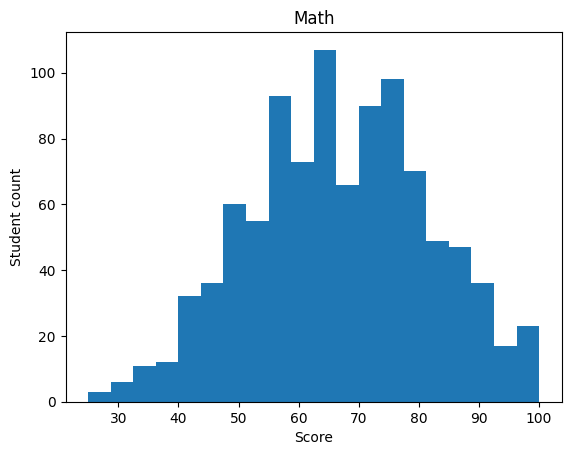

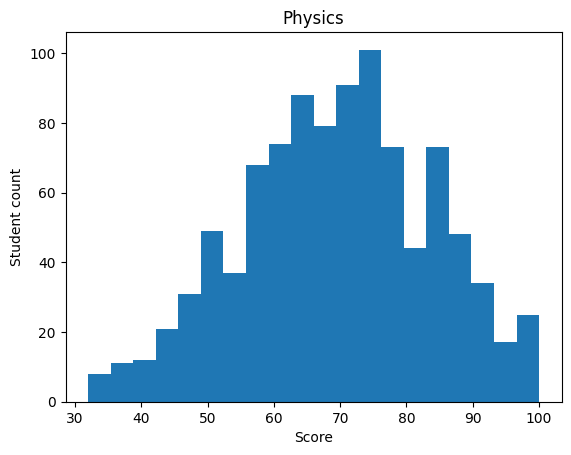

In [16]:
# 9. ENCONTRAR CORRELACIONES Y FRECUENCIAS

plt.hist(df['Algebra score'], bins=20)
plt.title("Algebra")
plt.ylabel("Student count")
plt.xlabel("Score")
plt.show()

plt.hist(df["Chemistry score"], bins=20)
plt.title("Chemistry")
plt.ylabel("Student count")
plt.xlabel("Score")
plt.show()

plt.hist(df["Math score"], bins=20)
plt.title("Math")
plt.ylabel("Student count")
plt.xlabel("Score")
plt.show()

plt.hist(df["Physics score"], bins=20)
plt.title("Physics")
plt.ylabel("Student count")
plt.xlabel("Score")
plt.show()



In [17]:
# Correlación entre los datos = Mapas de calor
c = df.corr()
print(c)

                 Math score  Physics score  Chemistry score  Algebra score
Math score         1.000000       0.812055         0.798312       0.916674
Physics score      0.812055       1.000000         0.951536       0.968358
Chemistry score    0.798312       0.951536         1.000000       0.964652
Algebra score      0.916674       0.968358         0.964652       1.000000


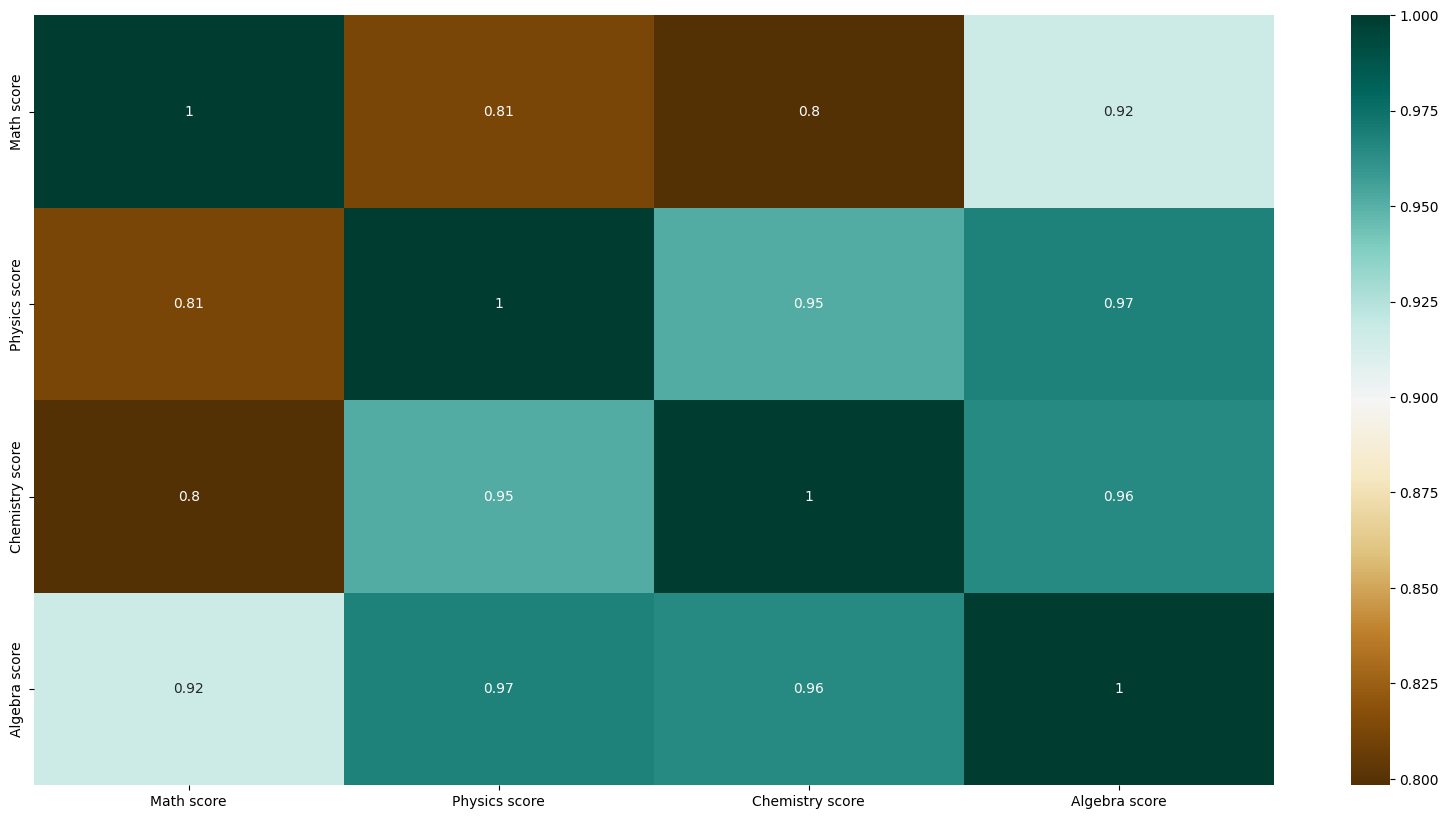

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(c,cmap="BrBG", annot=True)
plt.show()

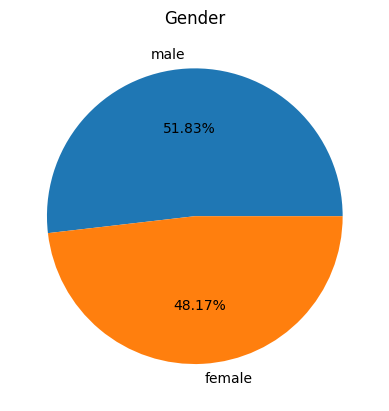

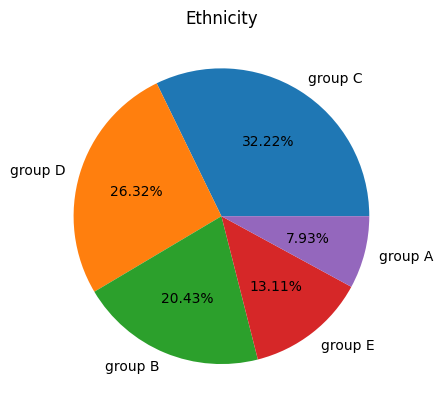

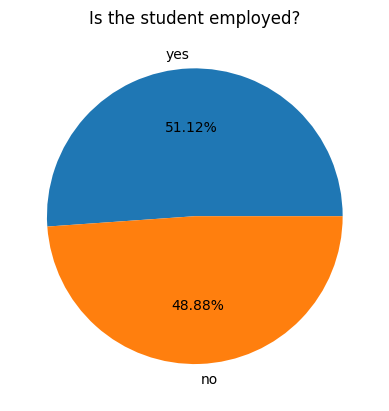

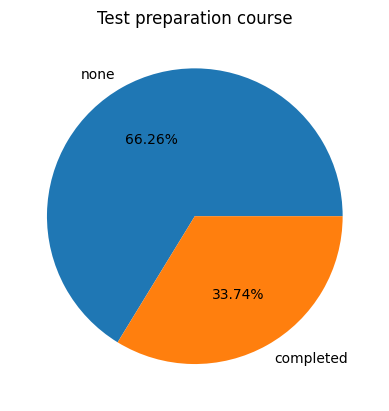

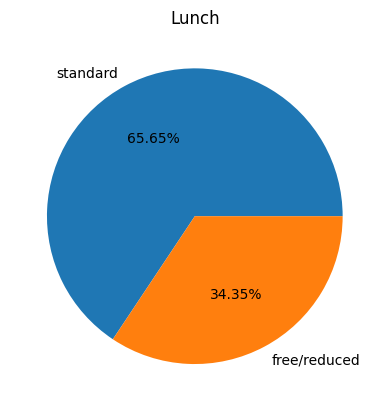

In [19]:
#pandas.value_counts() ->. devuelve una Serie con valores únicos en orden descendente de frecuencia
labels = df["Gender"].value_counts().index
sizes = df["Gender"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Gender")
plt.show()


# repetimos para ETNIA, EMPLEO y el resto de las variables categóricas
labels = df["Ethnicity"].value_counts().index
sizes = df["Ethnicity"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Ethnicity")
plt.show()

labels = df["Employed"].value_counts().index
sizes = df["Employed"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Is the student employed?")
plt.show()

labels = df["Test preparation course"].value_counts().index
sizes = df["Test preparation course"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Test preparation course")
plt.show()

labels = df["Lunch"].value_counts().index
sizes = df["Lunch"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Lunch")
plt.show()


## Respondiendo preguntas

### Ejemplo: ¿Hay alguna relación entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio?

In [20]:
df["Average Score"] = df.mean(axis=1)
# axis = 1 hace que aplique la función sobre los valores numéricos de la fila en lugar de las columnas.
df

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average Score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


In [21]:
si = df[df['Test preparation course'] == 'completed']
no = df[df['Test preparation course'] == 'none']

<AxesSubplot: xlabel='Average Score', ylabel='Count'>

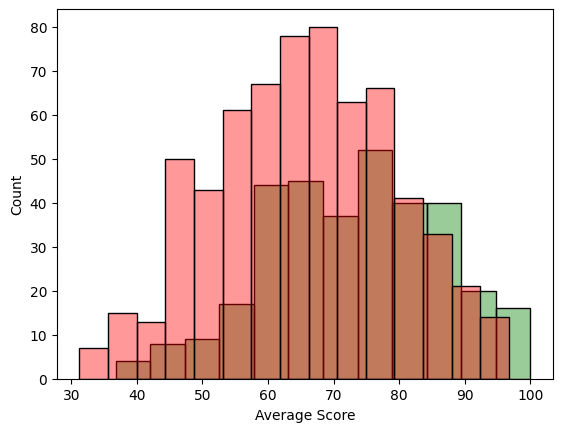

In [22]:
sns.histplot(si['Average Score'], color = 'green', alpha=.4, fill=True )
sns.histplot(no['Average Score'], color = 'red', alpha=.4, fill=True )


In [23]:
print('Realizaron el curso: ', si['Test preparation course'].count())
print('No realizaron el curso: ', no['Test preparation course'].count())

Realizaron el curso:  332
No realizaron el curso:  652


Conclusión: Si bien la cantidad de alumnos que no realizó el curso preparatorio casi duplica a la de quienes lo han completado, esta diferencia no se ve reflejada significativamente en el promedio de notas.

Se recomienda auditar los contenidos de los cursos, a fines de lograr una mejora en el  rendimiento académico y aumentar el interés del alumnado.

### ¿Hay una diferencia significativa en el rendimiento académico entre hombres y mujeres?

In [24]:
# Importamos NumPy
import numpy as np

# Creamos una lista con las columnas de calificaciones
columns = ['Math score', 'Physics score', 'Chemistry score', 'Algebra score']

# Calculamos la media de las calificaciones de cada estudiante y añadimos el resultado a una nueva columna del DataFrame
df['Rendimiento académico'] = df[columns].mean(axis=1)


In [25]:
df

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average Score,Rendimiento académico
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25,76.25


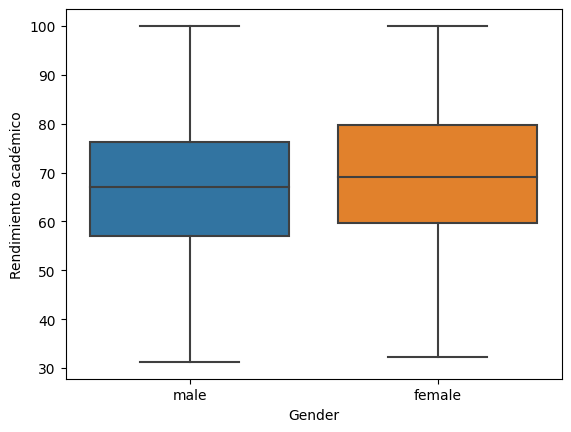

In [26]:
# Importamos Seaborn
import seaborn as sns

# Creamos el gráfico
sns.boxplot(data=df, x='Gender', y='Rendimiento académico')

# Mostramos el gráfico
plt.show()


En este gráfico de cajas, el eje x representa el género (hombres o mujeres), y el eje y representa el rendimiento académico. Cada caja del gráfico corresponde a un género, y muestra la distribución del rendimiento académico en ese género. La línea horizontal dentro de la caja representa la mediana del rendimiento académico en ese género, y la caja representa el rango intercuartil (es decir, la diferencia entre el tercer y el primer cuartil). Las líneas verticales  "bigotes" representan el rango restante de los datos desde el mínimo hasta el primer cuartil y desde el tercer cuartil hasta el máximo.

En el gráfico podemos inferir que el rendimiento académico de las mujeres es mayor que el de los hombres,  son diferencias observadas con los datos suministrados.

###  ¿Hay diferencia entre la cantidad de estudiantes que tienen un empleo y los que no lo tienen ?

<AxesSubplot: xlabel='Employed', ylabel='Rendimiento académico'>

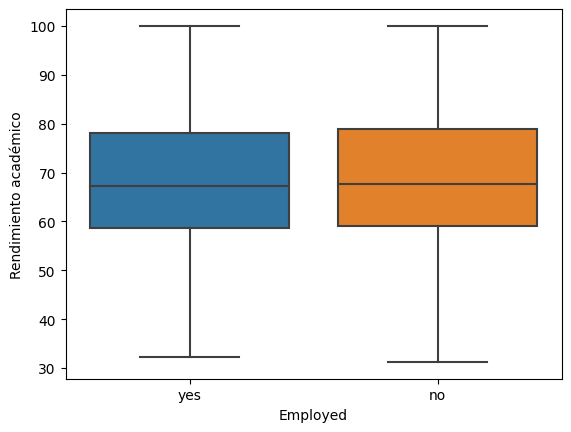

In [27]:
# Importamos seaborn
import seaborn as sns

# Creamos el gráfico de cajas
sns.boxplot(data=df, x='Employed', y='Rendimiento académico')


Como no se visualiza muy bien la diferencia, hago un gráfico de barras para mostrar mejor las diferencias entre los que tienen empleo y los que no.

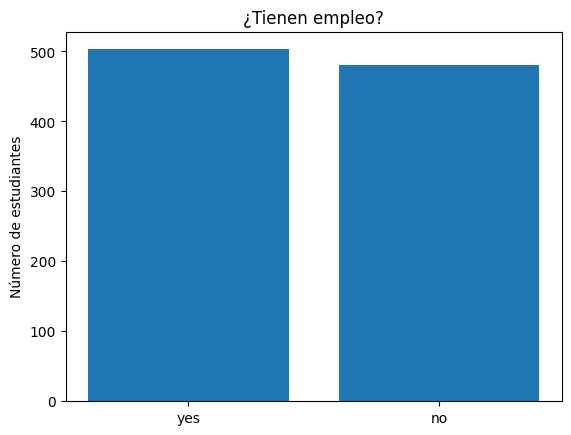

In [28]:
# Importamos Matplotlib
import matplotlib.pyplot as plt

# Contamos cuántos estudiantes tienen un empleo y cuántos no tienen un empleo
empleo = df['Employed'].value_counts()

plt.show()

# Creamos el gráfico de barras
plt.bar(empleo.index, empleo)

# Añadimos un título al gráfico
plt.title('¿Tienen empleo?')

# Añadimos etiquetas al eje y
plt.ylabel('Número de estudiantes')


# Mostramos el gráfico
plt.show()


Acá podemos visualizar que es un poco mayor la diferencia entre los estudiantes que tienen empleo y los que no.

In [29]:
counts = df['Employed'].value_counts()
print(counts)


yes    503
no     481
Name: Employed, dtype: int64


### ¿En qué materias tienen los alumnos mayor rendimiento académico?

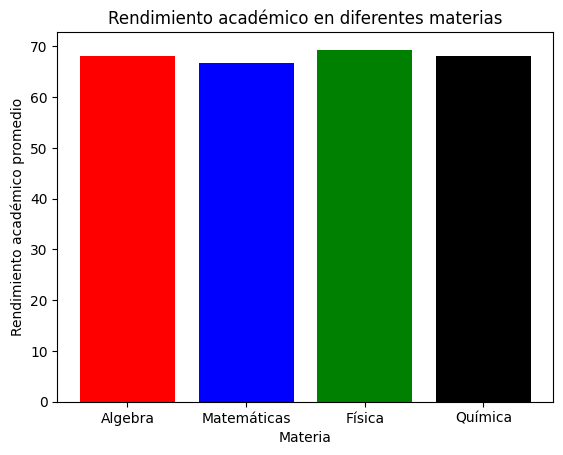

In [30]:
# Importamos Matplotlib
import matplotlib.pyplot as plt

# Creamos una lista que contenga los datos de rendimiento académico en cada materia
algebra_scores = df['Algebra score']
math_scores = df['Math score']
physics_scores = df['Physics score']
chemistry_scores = df['Chemistry score']

# Creamos el gráfico de barras
plt.bar(['Algebra','Matemáticas', 'Física', 'Química'], [algebra_scores.mean(), math_scores.mean(), physics_scores.mean(), chemistry_scores.mean()], color=['red', 'blue', 'green', 'black'])

# Añadimos títulos al eje x e y
plt.xlabel("Materia")
plt.ylabel("Rendimiento académico promedio")

# Añadimos título al gráfico
plt.title("Rendimiento académico en diferentes materias")

# Mostramos el gráfico
plt.show()



Acá se puede visualizar que el rendimiento académico promedio de física es mayor que en las otras materias. 

Se podrían poner clases extra para los alumnos en matemáticas para que mejoren su rendimiento académico.

### ¿Cómo es el rendimiento académico por género y por materia?

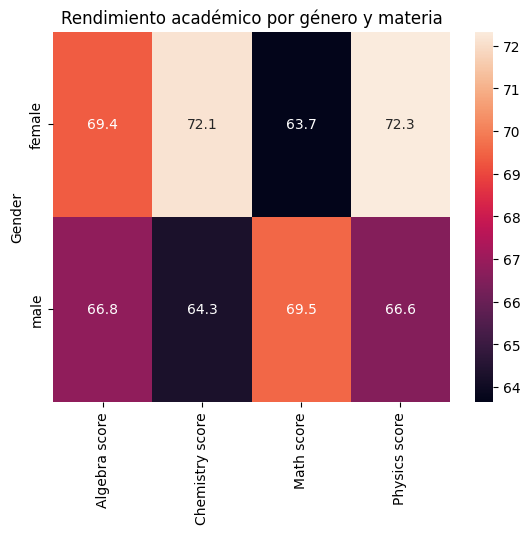

In [31]:
import seaborn as sns

# Creamos el gráfico de mapa de calor
sns.heatmap(df[['Gender', 'Algebra score', 'Math score', 'Physics score', 'Chemistry score']].pivot_table(index='Gender', values=['Algebra score', 'Math score', 'Physics score', 'Chemistry score']), annot=True, fmt='.1f')

# Añadimos título al gráfico
plt.title("Rendimiento académico por género y materia")

# Mostramos el gráfico
plt.show()


En el mapa de calor vemos que el rendimiento académico de matemáticas es mayor para los varones, mientras que en las otras tres materias el rendimiento académico es mayor en las mujeres.

### ¿Cuál es el género mayor en la muestra?

In [32]:
counts = df['Gender'].value_counts()
print(counts)


male      510
female    474
Name: Gender, dtype: int64


Hay más mujeres.

### ¿Qué cantidad de padres  hicieron una maestría y cuántos fueron a la universidad?

In [33]:
counts = df['Parental level of education'].value_counts()
print(counts)


some college          213
high school           201
associate's degree    201
some high school      187
bachelor's degree     112
master's degree        70
Name: Parental level of education, dtype: int64


Vemos que hay menos padres que hicieron una maestría y más que fueron a la universidad. 

<AxesSubplot: >

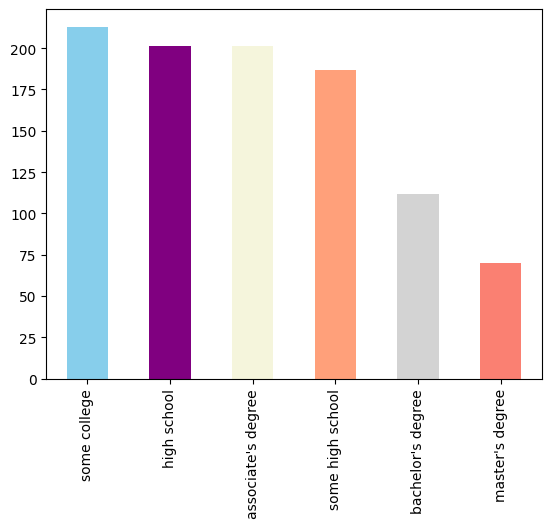

In [34]:
niveles = pd.Series([213, 201, 201, 187, 112, 70], index=["some college", "high school", "associate's degree", "some high school", "bachelor's degree", "master's degree"])
niveles.plot(kind='bar', color=['#87CEEB', '#800080', '#F5F5DC', '#FFA07A', '#D3D3D3', '#FA8072'])



### ¿Cuántos estudiantes toman el almuerzo standard y cuántos el almuerzo gratis o reducido?

In [35]:
counts = df['Lunch'].value_counts()
print(counts)

standard        646
free/reduced    338
Name: Lunch, dtype: int64


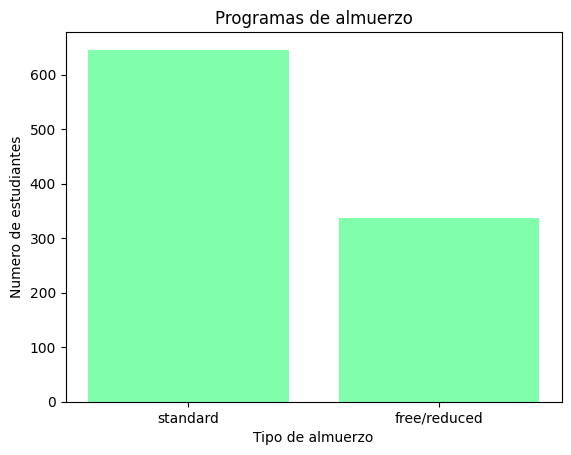

In [36]:
import matplotlib.pyplot as plt

# Datos sobre los programas de almuerzo de los alumnos
lunch = ["standard", "free/reduced"]
students = [646, 338]

# Hacemos un gráfico de barras
plt.bar(lunch, students, color='#81FEAB')

# Añadimos títulos y etiquetas
plt.title("Programas de almuerzo")
plt.xlabel("Tipo de almuerzo")
plt.ylabel("Numero de estudiantes")

# Mostrar gráfica
plt.show()


Los estudiantes toman casi el doble de almuerzo standard que el gratis o reducido.  Se podrían cambiar los menúes para que más estudiantes tomen los que son free y utilicen ese dinero para comprar apuntes o pagar los viajes hacia los lugares de estudio.

### 

### 

## 

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33ae9fa5-d48a-4f15-8764-470f7597d073' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>